#**Credit Card Approval-Capstone Project**

## **Introduction**

Credit card approval systems play a pivotal role in assessing the creditworthiness of individuals applying for credit. The traditional methods of credit scoring involve a combination of credit bureau scores, historical financial data, and internal information. However, with the advent of data science and machine learning, banks are now leveraging advanced predictive models to enhance the accuracy and efficiency of their credit card approval processes.

###**Features names and Data Types: (Credit_Card.csv)**

**Ind_ID:** Client ID (int)

**Gender:** Gender information (object)

**Car_owner:** Having car or not (object)

**Propert_owner:** Having property or not (int)

**Children:** Count of children (int)

**Annual_income:** Annual income (float)

**Type_Income:** Income type (object)

**Education:** Education level (object)

**Marital_status:** Marital_status (object)

**Housing_type:** Living style (object)

**Birthday_count:** Use backward count from current day (0), -1 means yesterday.

**Employed_days:** Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.(int)

**Mobile_phone:** Any mobile phone (int)

**Work_phone:** Any work phone (int)

**Phone:** Any phone number (int)

**EMAIL_ID:** Any email ID (int)

**Type_Occupation:** Occupation (object)

**Family_Members:** Family size (int)



##**Another data set (Credit_card_label.csv) contains two key pieces of information**

**ID**: The joining key between application data and credit status data, same is Ind_ID

**Label:** **0** is application **approved** and **1** is application **rejected**.

In [ ]:
import pandas as pd            # importing all the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
credit = pd.read_csv("/content/drive/MyDrive/Credit_card.csv")           # reading credit_card dataset
labels = pd.read_csv("/content/drive/MyDrive/Credit_card_label.csv")     # reading label data set

In [ ]:
credit.head()    # displays the first 5 rows with all columns from credit data set

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
labels.head()        # displays first 5 rows along with all columns in labels dataset

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
dff = pd.merge(credit,labels,on='Ind_ID')    # Merging the data frames for data analysis using 'merge' function through a common column 'Ind_ID'

In [ ]:
dff.head()        # After merging the two data frames, label column has been added towards the end of the 'dff' dataframe.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
dff['label'].unique()       # 0-Approved, 1-Rejected

array([1, 0])

In [ ]:
dff.shape                   # There are 1548 rows, 19 columns.

(1548, 19)

In [ ]:
dff.info()                  # Displays all the data types and non null count along with the names of columns in the data set.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
dff.isnull().sum()           # Displays the columns with null values and their count

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

**Observations:** Null values are present in GENDER, Annual_income, Age,Type_Occupation columns.

In [ ]:
dff[dff.duplicated()]   # Checking for duplicate rows in the data set. There are no duplicates in this data set.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


In [ ]:
dff.describe(include="all")     # Provides the statistical data for all the columns.

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


### **Data Visualisation through plots(before data cleaning & pre processing):**

##**Univariate analysis plots:**

###**All Numerical columns data distribution is shown through Histograms**

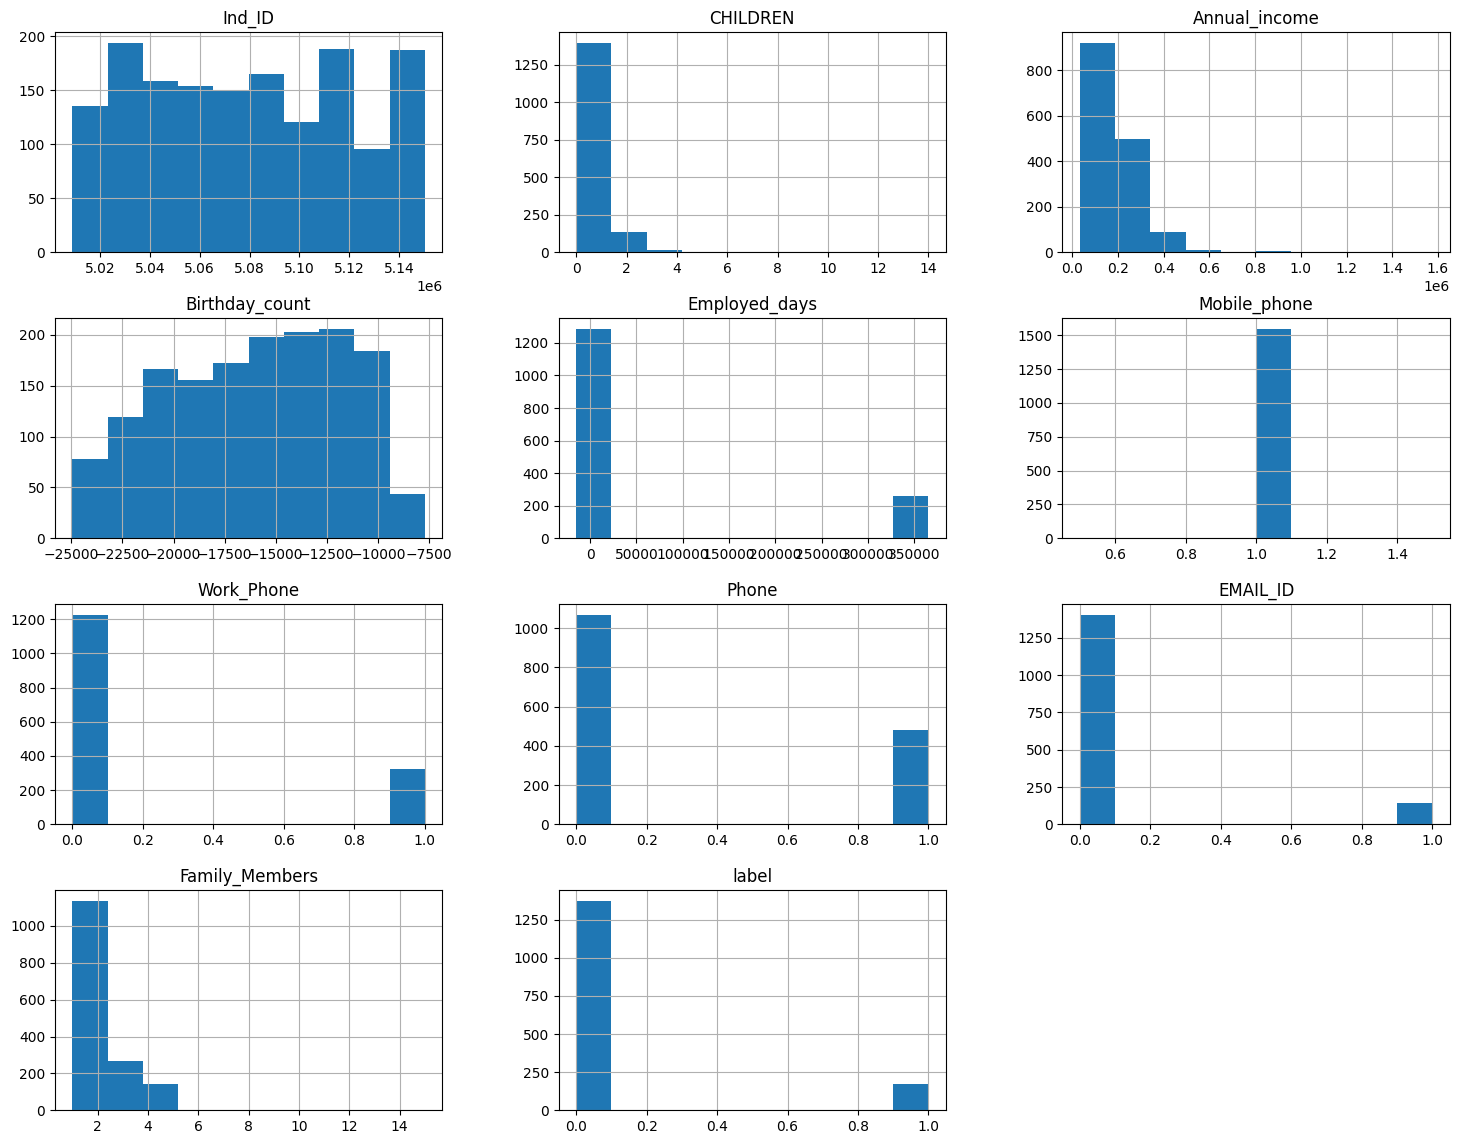

In [ ]:
# histograms for all numerical columns
dff.hist(figsize=(18,14))
plt.show()

###**All Categorical columns distribution is shown through Countplots**

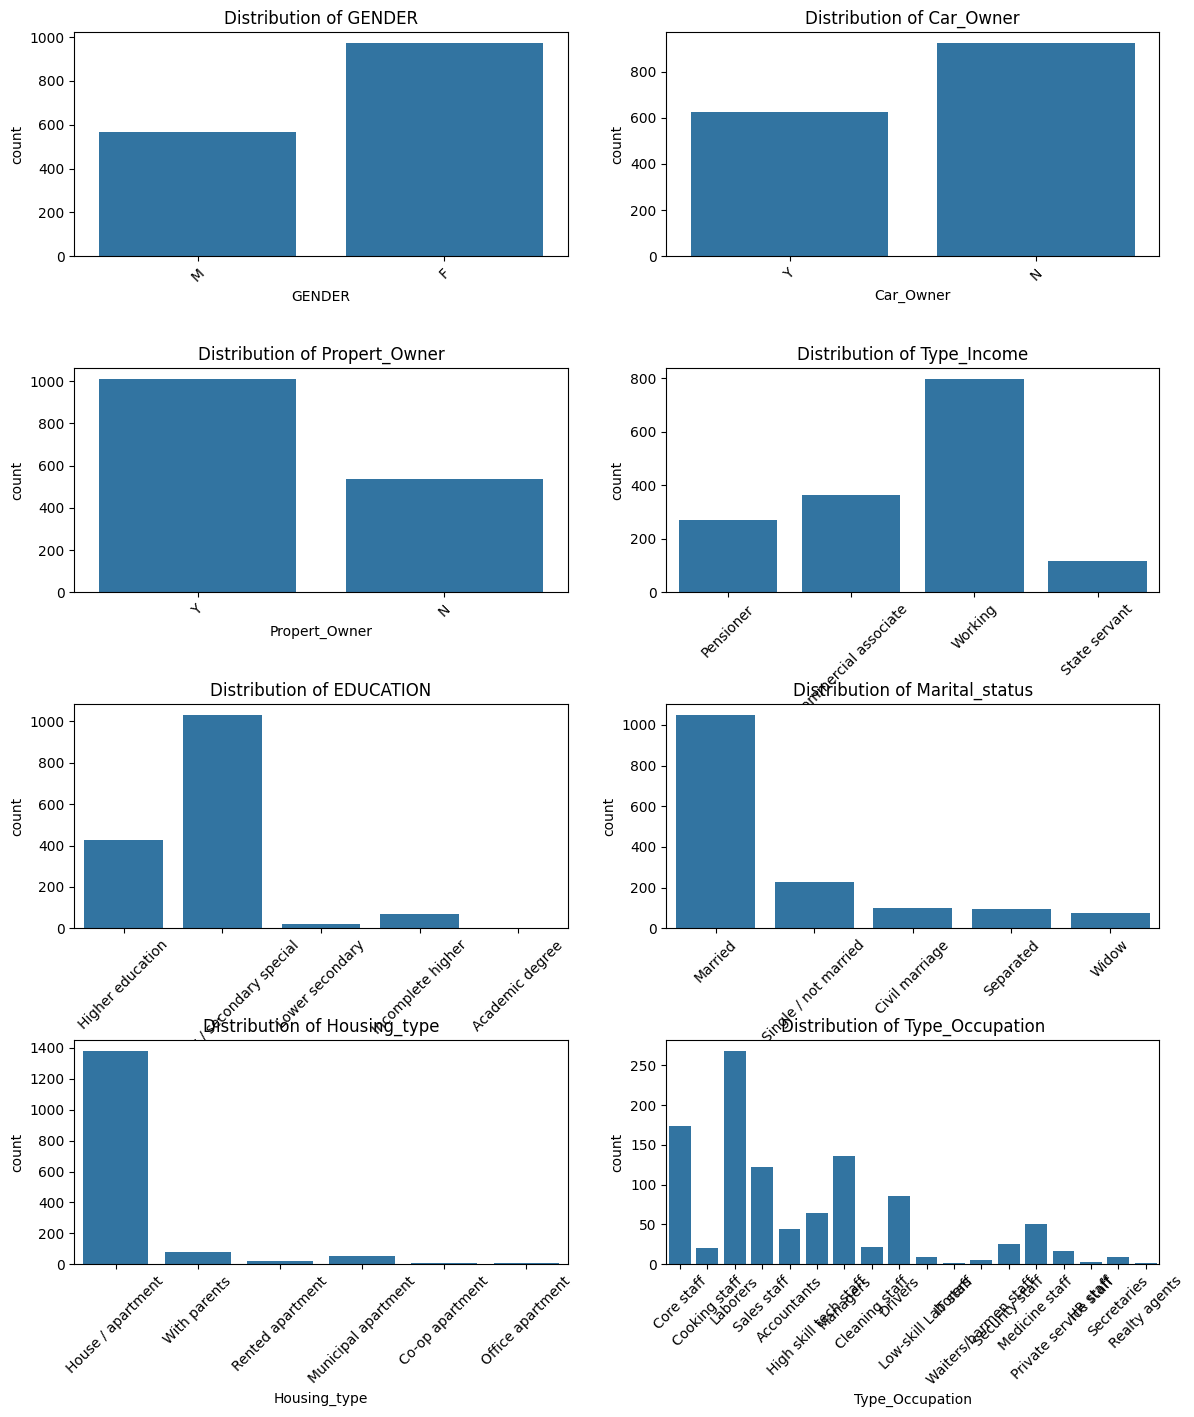

In [ ]:
# Filtering the categorical columns
categorical_columns = dff.select_dtypes(include=['object']).columns

# Number of rows needed
num_rows = (len(categorical_columns) + 1) // 2

# Setting up subplots with two columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)
# Flatten the axes array to iterate over the subplots
axes = axes.flatten()
# Plot each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=dff, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels


# If the number of subplots is odd, remove the last empty subplot
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

**Observations:**

*Secondary special has highest count in education column,Married tops in marital status column,more working from type of income column, Females are more in number than males, Car owners are less and vice versa for property owners, labourers are more in count in type of occupation column, house/apartment count is more in housing type column.*

**Renaming the columns for better understanding**

In [ ]:
dff = dff.rename(columns={'Birthday_count':'Age','label':'Approval_Status','Propert_Owner':'Property_Owner'})

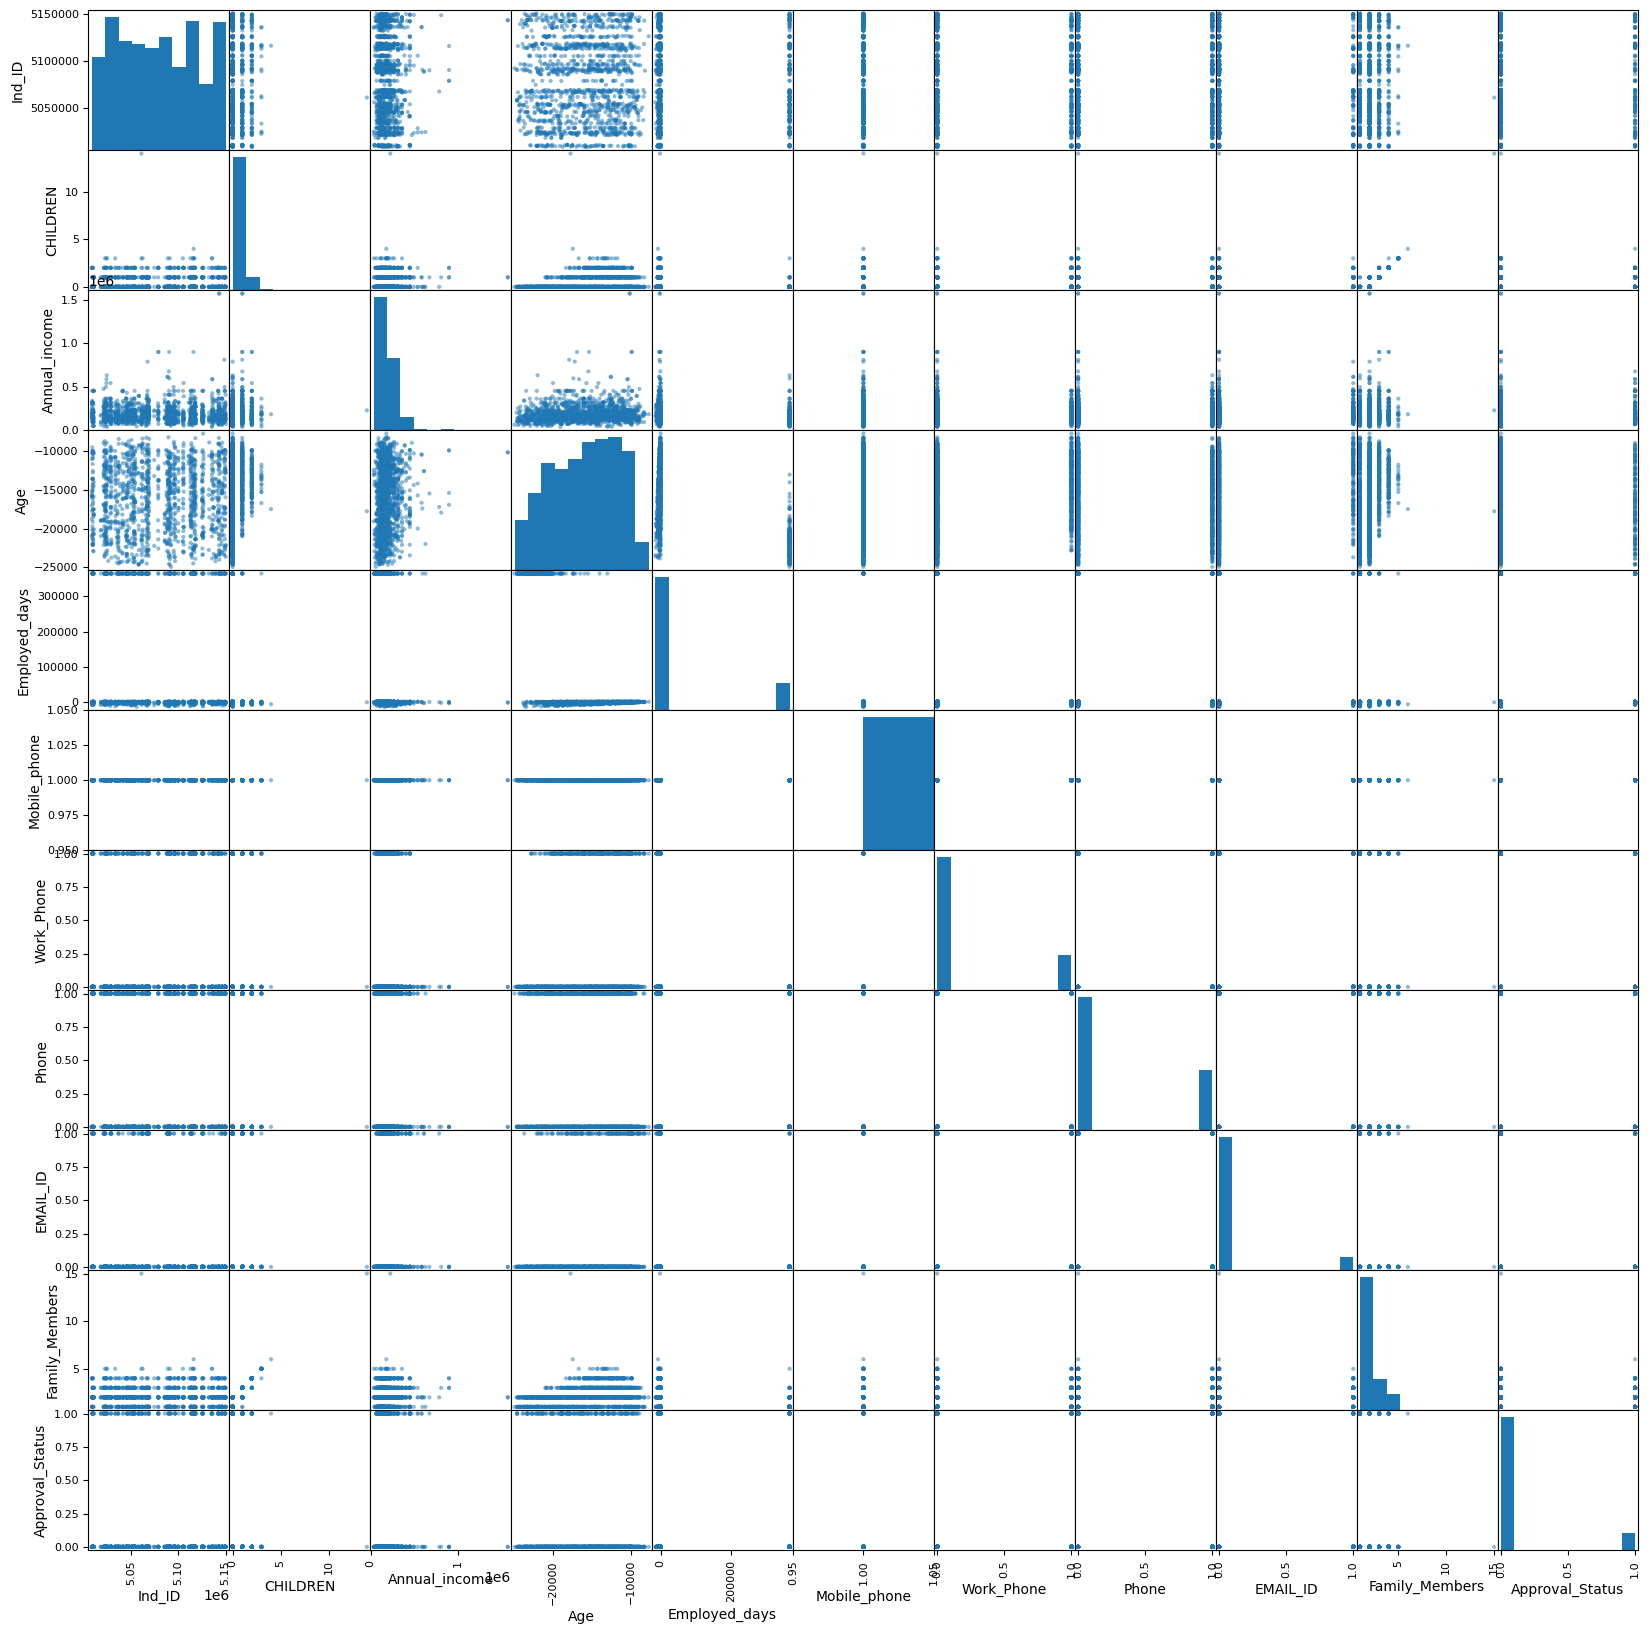

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(dff,figsize=(20,20))             # shows the relation of target variable ie., approval status with other variables.

In [ ]:
dff.columns             # displays all column names

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Property_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'Employed_days', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Approval_Status'],
      dtype='object')

**Preparing the "Age" and "Employed_days" column in meaningful format.**

In [ ]:
df = dff.copy(deep=True)       # creating a new data frame df to retain original dff dataframe.

In [ ]:
df[df['Employed_days']>0]       # 261 rows have positive employed days values, which means those customers are currently "unemployed"
df[df['Employed_days']<0]       # 1287 rows are negative employed days, means they are currently "employed"
df[df['Employed_days']==0]      # none of the rows have 0 employed days.

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approval_Status


**Creating a new column 'Employment_Status' with 0 (unemployed) and 1(currently employed) as all positive values in 'Employed_days' column mean person is currently unemployed and negatives mean currently employed.**

In [ ]:
df['Employment_Status'] = np.where(df['Employed_days'] < 0, 1, 0)

In [ ]:
df.head(1)    # 'Employment_Status' column has been added to df

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approval_Status,Employment_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,0


**dropping off the 'Employed days column after adding Employment status column.**

In [ ]:
df.drop(columns='Employed_days',axis=1,inplace=True)

**Age column:**

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  #The pd.to_numeric with errors='coerce' is used to handle any non-numeric values or NaNs in the 'Age' column.

In [ ]:
# converting the birthday count column in original data frame to age by dividing with 365
df['Age'] = (abs(df['Age']) / 365.25).round(2)           # 'abs' is used to get the absolute value after calculation irrespective of negative values.

In [ ]:
df['Age']

0       51.39
1       37.12
2         NaN
3       37.12
4       37.12
        ...  
1543    32.74
1544    28.01
1545    36.07
1546    41.87
1547    45.45
Name: Age, Length: 1548, dtype: float64

In [ ]:
# renaming few column names in proper format
df = df.rename(columns={'GENDER':'Gender','CHILDREN':'Children','EDUCATION':'Education','EMAIL_ID':'Email_Id'})

#**Imputing/Removing the null values and Handling Outliers :**

**Gender Column:**

In [ ]:
# Deleting the null values in the Gender column as there are only 7 missing values.
df=df.dropna(subset=["Gender"])

In [ ]:
df['Gender'].isnull().sum()      # cross check for null values in Gender column.

0

**Annual_income column:**

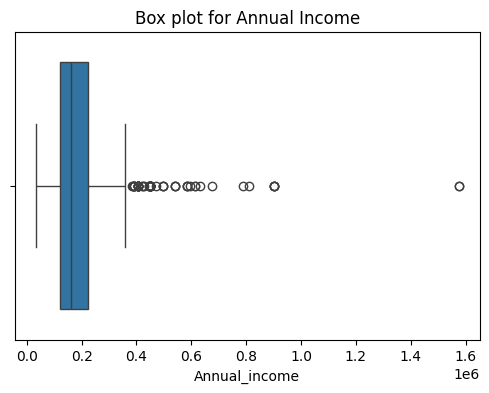

In [ ]:
# checking for outliers in "Annual Income" column
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Annual_income'],vert=False)
plt.title("Box plot for Annual Income")
plt.show()

###**Observations:** Since there are outliers present for the Annual Income column, I replaced the missing values with **median income.**

In [ ]:
df["Annual_income"] = df["Annual_income"].fillna(df["Annual_income"].median())
df["Annual_income"].isnull().sum()

0

**Handling the Outliers in "Annual Income" column:**

In [ ]:
df.describe()['Annual_income']          # checking the statistical data for "Annual Income" column

count    1.541000e+03
mean     1.903670e+05
std      1.121680e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.620000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64

In [ ]:
# Calculating Q1, Q3, IQR, Lower and Upper limits to cap the data values within these limits.
q1=df.describe()['Annual_income']["25%"]
print(q1)
q3=df.describe()['Annual_income']["75%"]
print(q3)
IQR=q3-q1
print(IQR)
lower_limit= q1-1.5*IQR
upper_limit=q3+1.5*IQR
print(lower_limit)
print(upper_limit)

121500.0
225000.0
103500.0
-33750.0
380250.0


In [ ]:
# capping the data set's Annual income column with lower_limit,upper_limits
df["Annual_income"]=df["Annual_income"].clip(lower_limit,upper_limit)

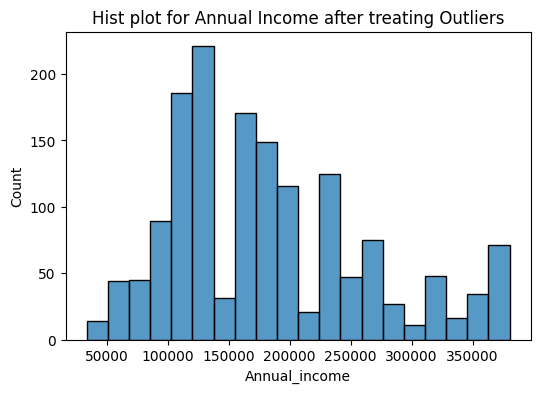

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(x=df['Annual_income'])
plt.title("Hist plot for Annual Income after treating Outliers")
plt.show()

**Observations:** After treating the outliers with clip function, we can observe that the outliers have been replaced with median value and the graph is made almost symmetrical.

**Age column:**

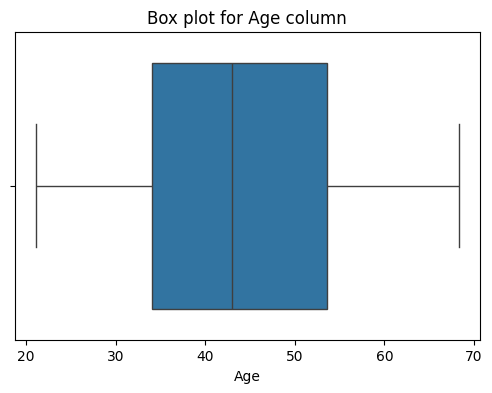

In [ ]:
# checking for outliers in "Age" column
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'],vert=False)
plt.title("Box plot for Age column")
plt.show()

**Observations:** Since there are no outliers in the Age column, we can replace the missing values with the column's mean value.

In [ ]:
# assumption is that the missing values are missing completely at random (MCAR) and that the mean is an unbiased estimate of the missing values,so imputing with mean values.
df['Age'] = df['Age'].fillna(df['Age'].mean())     # Imputing/filling the null values with mean values in Age column
df['Age'].isnull().sum()                           # All the null vlaues have been replaced with mean value

0

**Type_Occupation column:**

In [ ]:
print(df['Type_Occupation'].unique())          # checking for different types of occupations under occupation column and their individual count
print("\n",df['Type_Occupation'].value_counts())

[nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'Managers' 'Cleaning staff' 'Drivers' 'Low-skill Laborers'
 'High skill tech staff' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'
 'Secretaries' 'Realty agents']

 Laborers                 268
Core staff               172
Managers                 135
Sales staff              121
Drivers                   86
High skill tech staff     64
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64


In [ ]:
# replace the missing null values with "other"
df['Type_Occupation'].fillna('other',inplace=True)

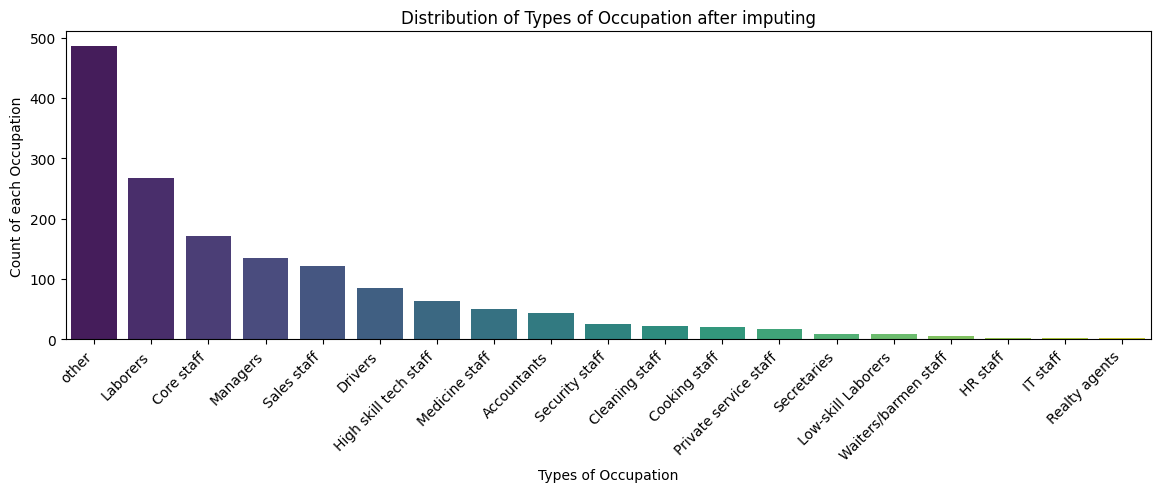

In [ ]:
# count plot for plotting the type of occupation column
plt.figure(figsize=(14,4))
sns.countplot(data=df, x='Type_Occupation', order=df['Type_Occupation'].value_counts().index, palette='viridis')
plt.title('Distribution of Types of Occupation after imputing')
plt.xlabel('Types of Occupation')
plt.ylabel('Count of each Occupation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
df.isnull().sum()        # all the null values have been replaced

Ind_ID               0
Gender               0
Car_Owner            0
Property_Owner       0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                  0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation      0
Family_Members       0
Approval_Status      0
Employment_Status    0
dtype: int64

##**Pair plots:**

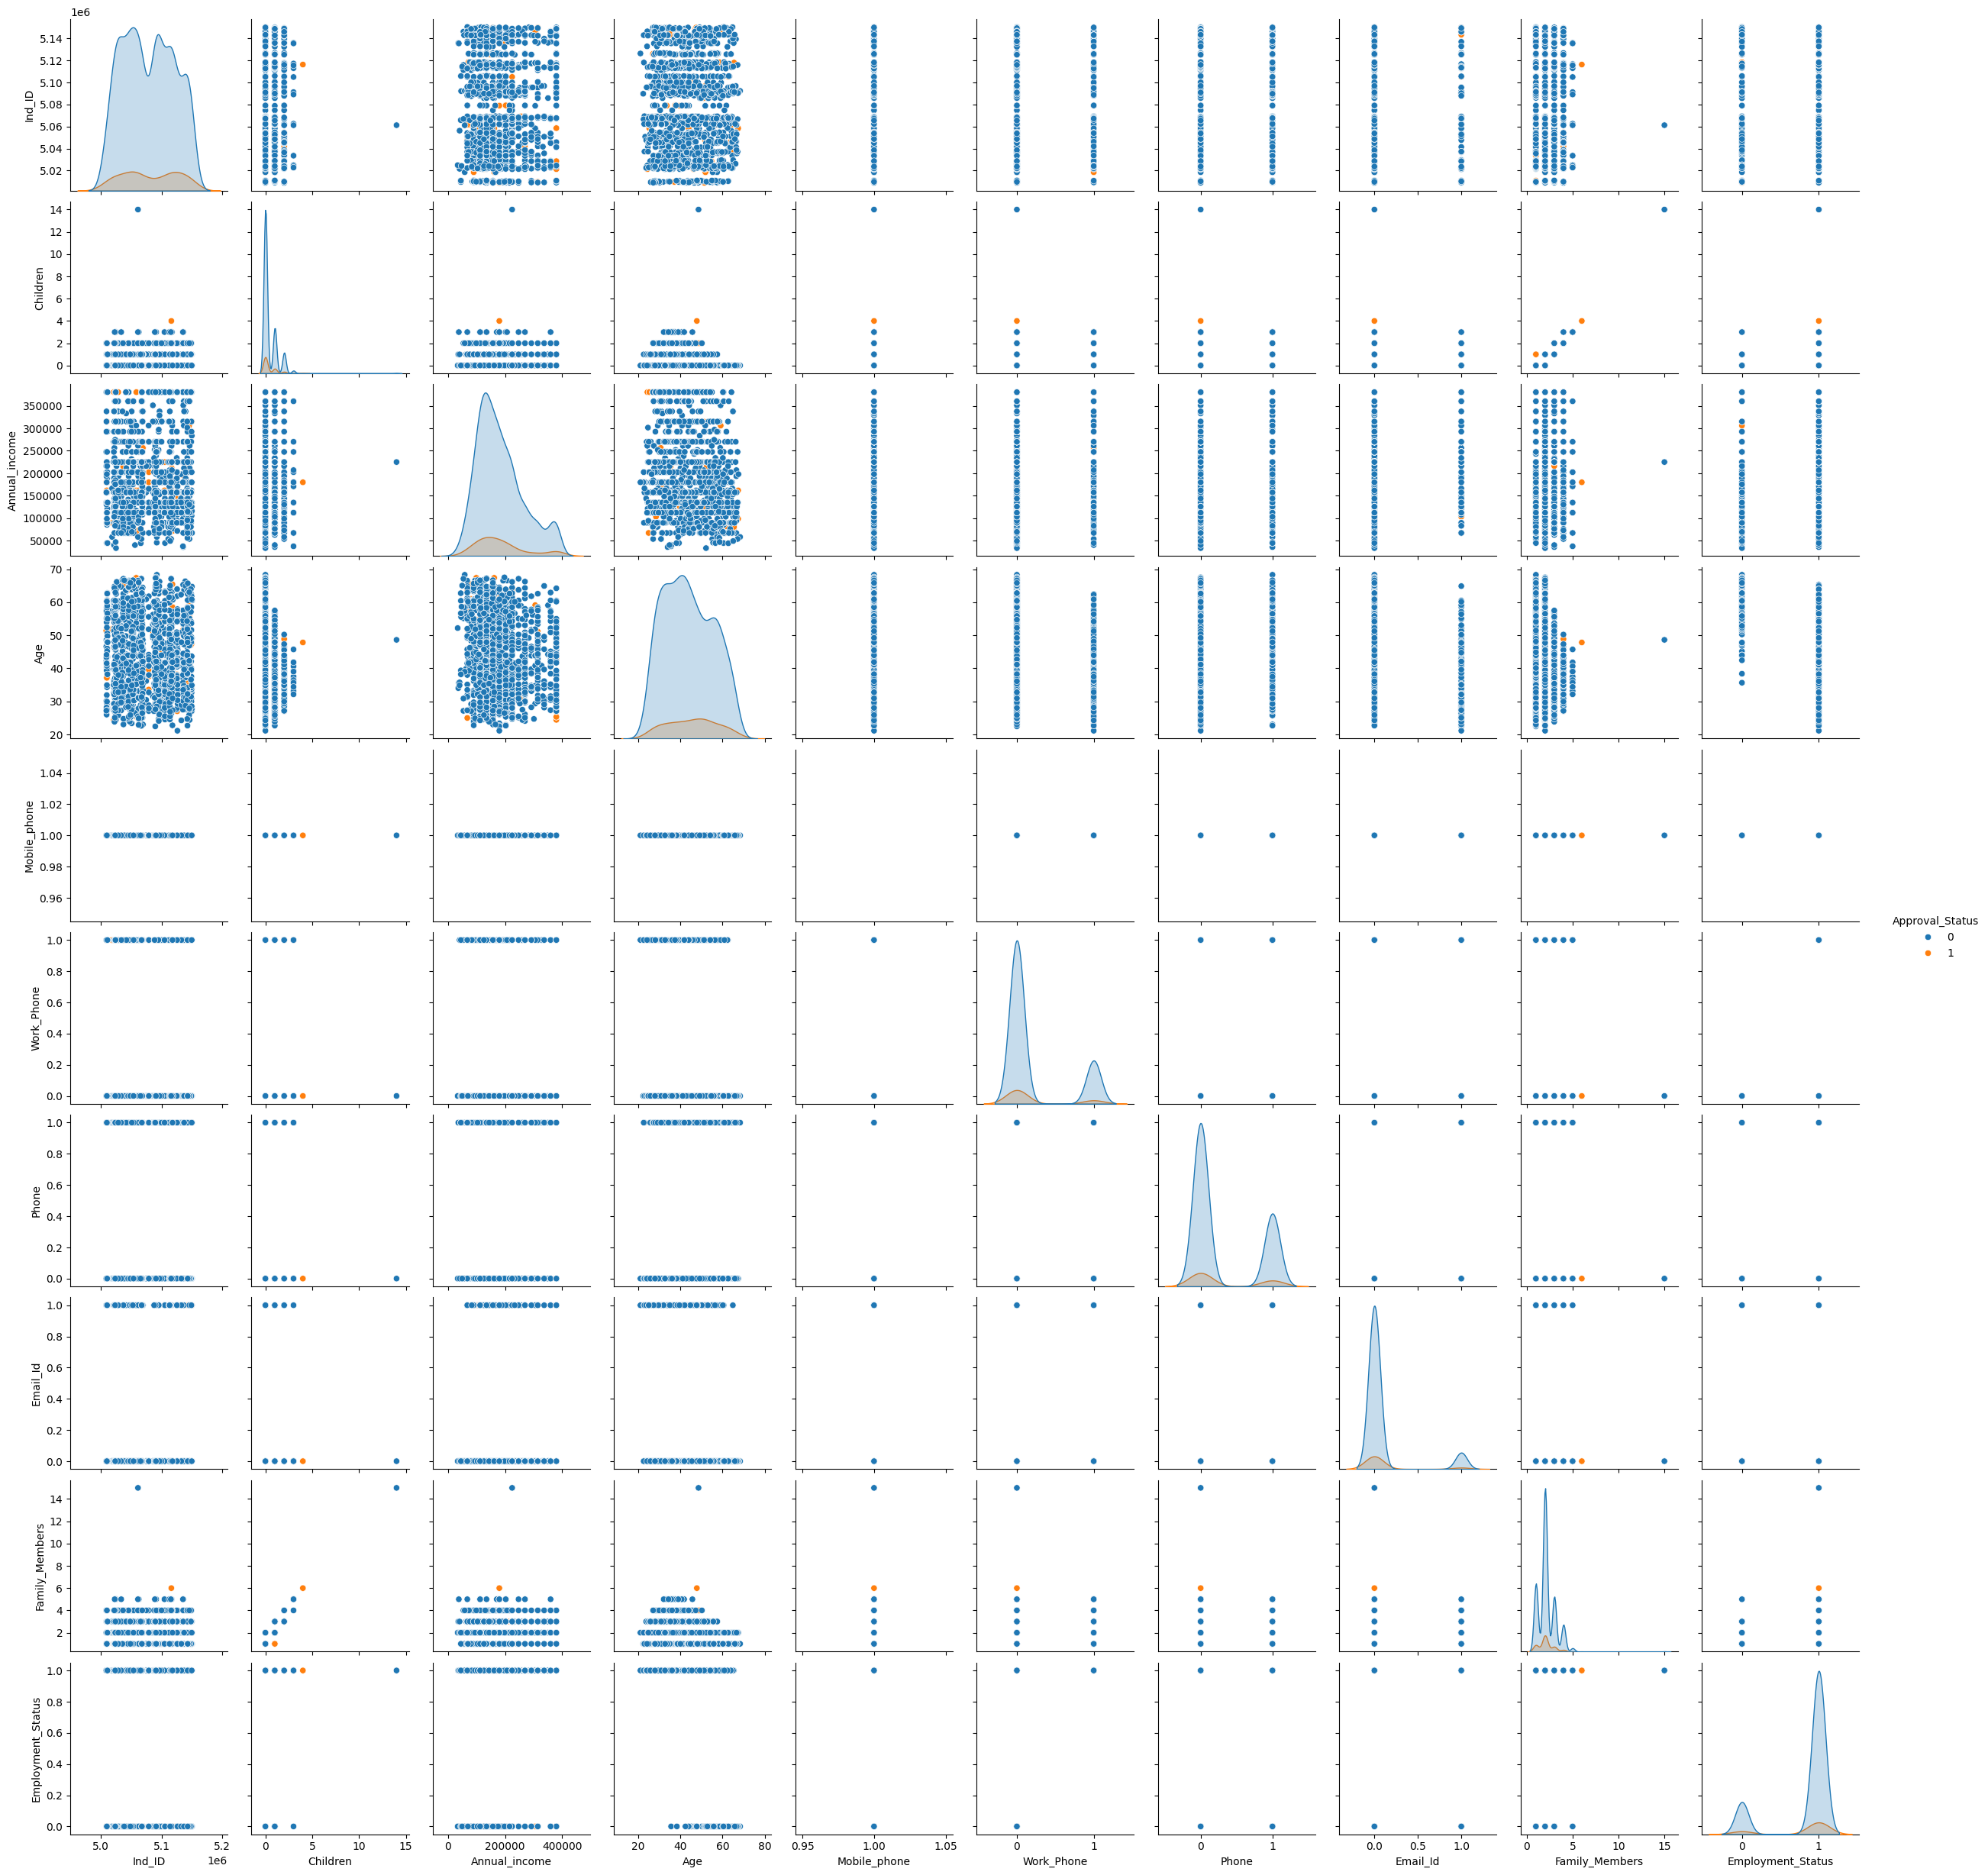

In [ ]:
sns.pairplot(df,hue="Approval_Status")
plt.show()                            # to see how the target variable "Approval_Status" is varying with other independent variables

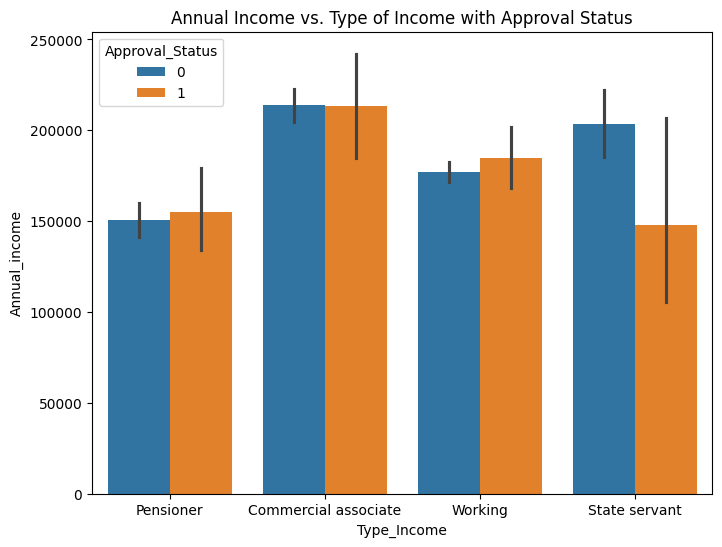

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Type_Income', y='Annual_income', hue='Approval_Status', data=df)
plt.title('Annual Income vs. Type of Income with Approval Status')
plt.show()

###**Observations:**
The **Commercial associate** has high annual income along with the chances of getting the credit card approved being high **followed by State servant,working,Pensioner.**

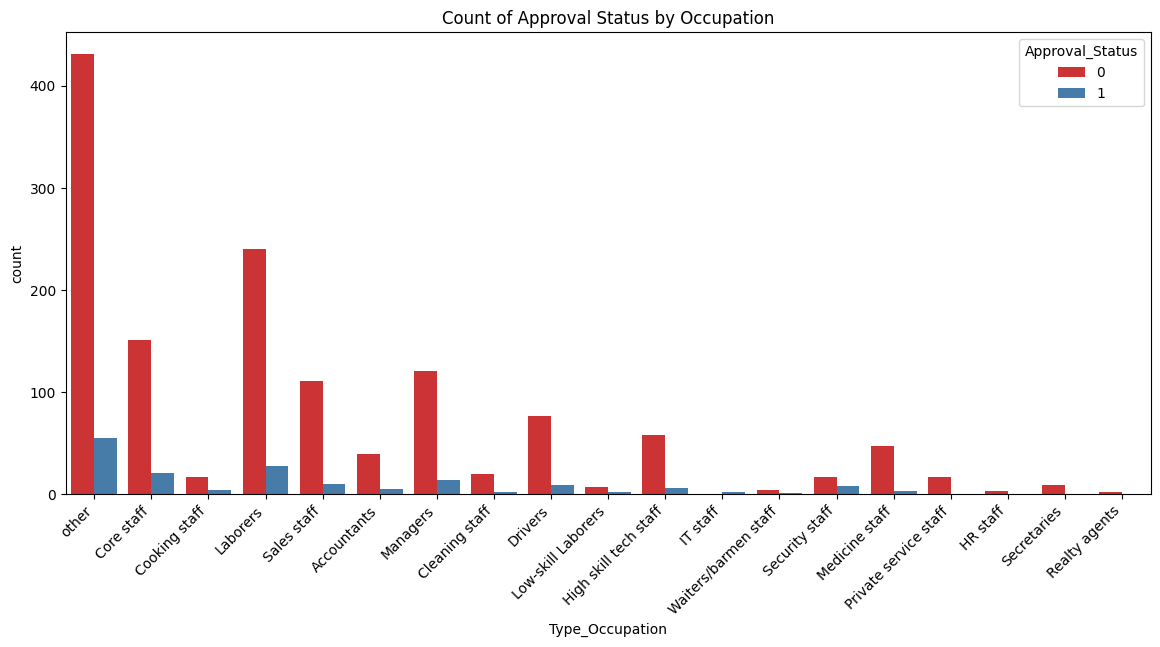

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Type_Occupation', hue='Approval_Status', data=df, palette='Set1')
plt.title('Count of Approval Status by Occupation')
plt.xticks(rotation=45, ha='right')
plt.show()

###**Observations:**

**"Other"** type of occupation has more chance of getting credit,it is the highest count as well followed by laborers,Core staff etc.,

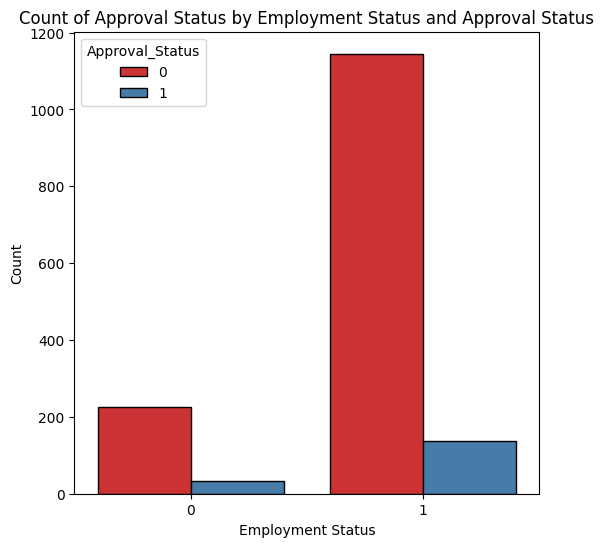

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Employment_Status', hue='Approval_Status', data=df, palette='Set1', hue_order=[0, 1], edgecolor='black', dodge=True)
plt.title('Count of Approval Status by Employment Status and Approval Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

###**Observations:**

**Employment status as 1** has more chance of getting approved for credit card ie., **currently working** people have high chance of getting credit card approved.

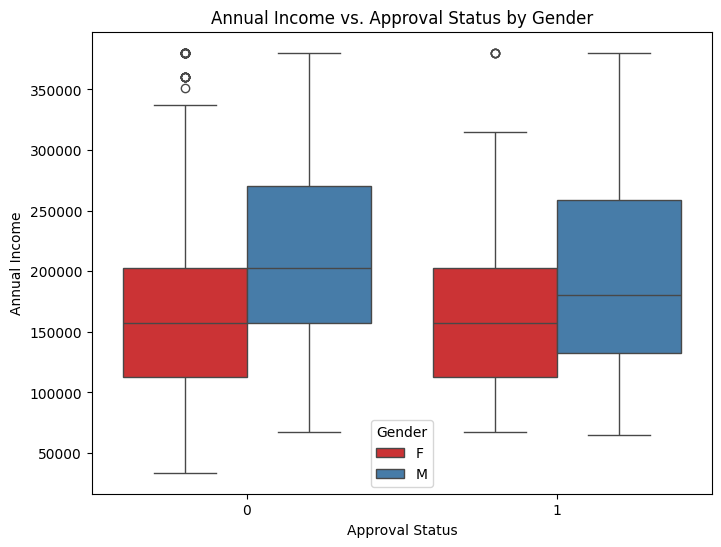

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Approval_Status', y='Annual_income', hue='Gender', data=df, palette='Set1')
plt.title('Annual Income vs. Approval Status by Gender')
plt.xlabel('Approval Status')
plt.ylabel('Annual Income')
plt.show()

###**Observations:**

Males and Females have almost equal chances of getting approved and rejected.

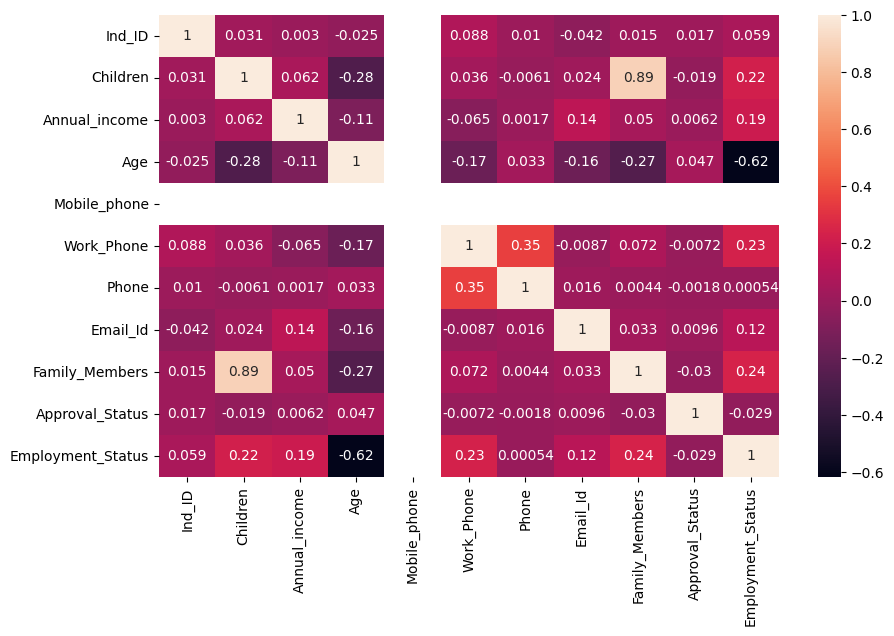

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Observations:** We can observe there are weak corelations with the target variable.

In [ ]:
df_spear = df.corr(method='spearman')
df_spear

,Ind_ID,Children,Annual_income,Age,Mobile_phone,Work_Phone,Phone,Email_Id,Family_Members,Approval_Status,Employment_Status
Ind_ID,1.000000,0.026155,-0.008623,-0.024256,NaN,0.088004,0.007702,-0.044812,0.007507,0.016660,0.056239
Children,0.026155,1.000000,0.065172,-0.338048,NaN,0.040402,0.014571,0.055700,0.814514,-0.014037,0.262546
Annual_income,-0.008623,0.065172,1.000000,-0.108285,NaN,-0.069867,-0.021470,0.117953,0.041063,-0.004529,0.204601
Age,-0.024256,-0.338048,-0.108285,1.000000,NaN,-0.165227,0.037500,-0.161903,-0.278003,0.047891,-0.587937
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.088004,0.040402,-0.069867,-0.165227,NaN,1.000000,0.353164,-0.008726,0.086653,-0.007203,0.231092
Phone,0.007702,0.014571,-0.021470,0.037500,NaN,0.353164,1.000000,0.015692,0.019702,-0.001799,0.000536
Email_Id,-0.044812,0.055700,0.117953,-0.161903,NaN,-0.008726,0.015692,1.000000,0.054068,0.009560,0.119568
Family_Members,0.007507,0.814514,0.041063,-0.278003,NaN,0.086653,0.019702,0.054068,1.000000,-0.025891,0.260885
Approval_Status,0.016660,-0.014037,-0.004529,0.047891,NaN,-0.007203,-0.001799,0.009560,-0.025891,1.000000,-0.029410


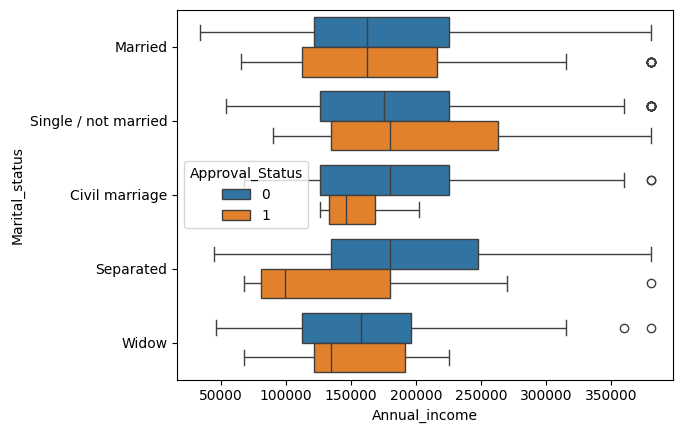

In [ ]:
sns.boxplot(x ='Annual_income',y ="Marital_status",hue='Approval_Status',data=df)
plt.show()

**Observations:** Single/not married are high chances of getting rejected, where as Seperated with medium to high income has more chances of getting approved.

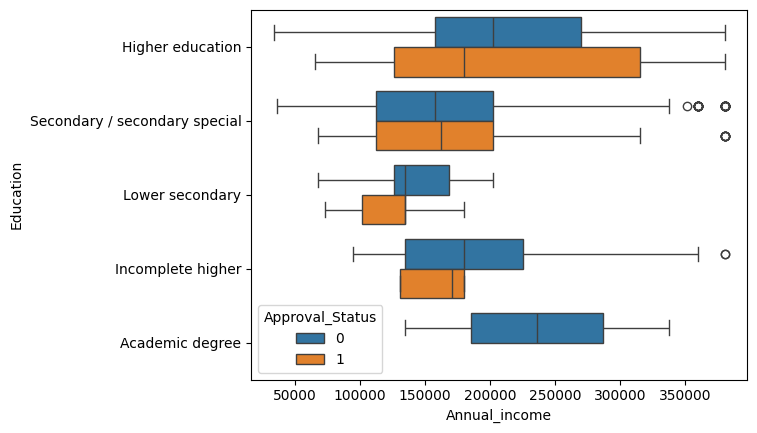

In [ ]:
sns.boxplot(x ='Annual_income',y ="Education",hue="Approval_Status",data=df)
plt.show()

###**Observations:**

People with Academic degree gets approved easily, higher education level has high rejected count.

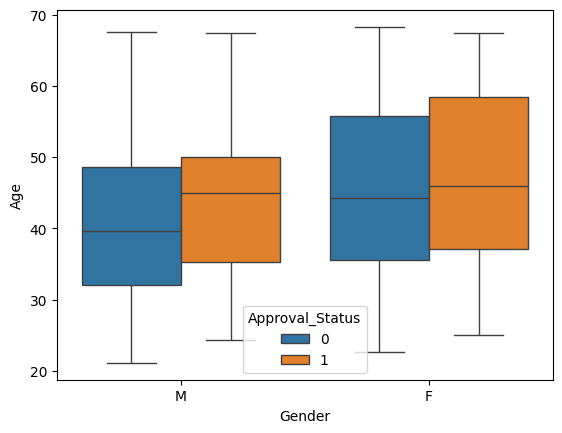

In [ ]:
sns.boxplot(x ='Gender',y ="Age",hue="Approval_Status",data=df)
plt.show()

**Observations:** Middle aged Males get their credit card approved /rejected much earlier than females,as some females in their 60s are getting approved/rejected.

In [ ]:
df['Approval_Status'].value_counts()

0    1371
1     170
Name: Approval_Status, dtype: int64

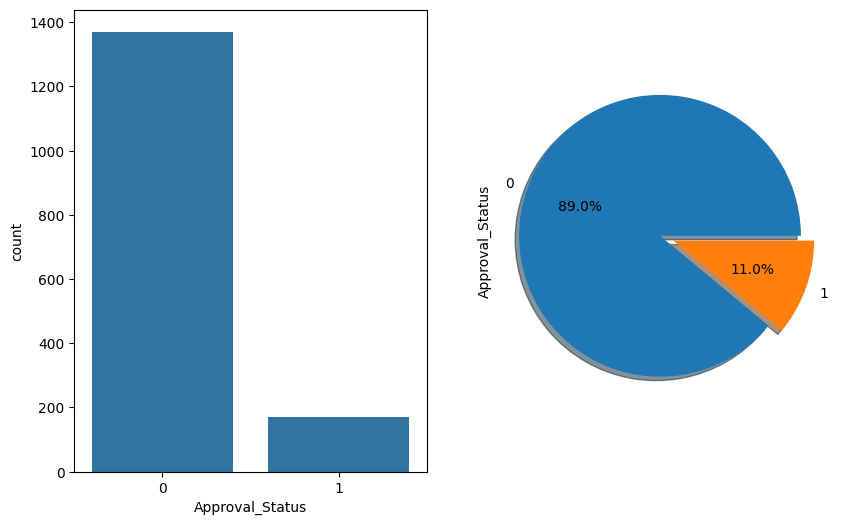

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.countplot(data=df,x="Approval_Status",ax=ax[0])
df['Approval_Status'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',labels=['0','1'],shadow=True,ax=ax[1])
plt.show()

**Observations:**


*   From the pie plot **89%** people got their credit card approved and **11%** got it rejected.
*   From the countplot approved people are **1371**in number(more in number), where as rejected are **170** in number, which is clearly an **imbalanced target data.**



#**Feature Engineering:**

**Encoding the categorical columns(Ordinal/Label Encoding):**

In [ ]:
df["Property_Owner"].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df["Car_Owner"].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df["Gender"].unique()

array(['M', 'F'], dtype=object)

**Using get_dummies for Gender, property owner and car owner columns as there is no inherent order between the values inside those columns.**

In [ ]:
df1 = df.copy(deep=True) # creating another copy of df dataframe to avoid any data losses.

In [ ]:
df1 = pd.get_dummies(df, columns=['Gender','Property_Owner','Car_Owner'], drop_first=True)

In [ ]:
df1['Education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [ ]:
# since "Education" column has an order, we use Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4}

df1['Education'] = df1['Education'].map(ordinal_mapping)

In [ ]:
df1['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [ ]:
df1['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [ ]:
df1['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
df1['Type_Occupation'].unique()

array(['other', 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'Managers', 'Cleaning staff', 'Drivers',
       'Low-skill Laborers', 'High skill tech staff', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [ ]:
df1 = pd.get_dummies(df1, columns=['Type_Income','Marital_status','Housing_type','Type_Occupation'], drop_first=True)

In [ ]:
df1.dtypes == "object"      # checking whether there are any more object type data left after encoding

Ind_ID                                   False
Children                                 False
Annual_income                            False
Education                                False
Age                                      False
Mobile_phone                             False
Work_Phone                               False
Phone                                    False
Email_Id                                 False
Family_Members                           False
Approval_Status                          False
Employment_Status                        False
Gender_M                                 False
Property_Owner_Y                         False
Car_Owner_Y                              False
Type_Income_Pensioner                    False
Type_Income_State servant                False
Type_Income_Working                      False
Marital_status_Married                   False
Marital_status_Separated                 False
Marital_status_Single / not married      False
Marital_statu

#**Hypothesis Testing**

##**1)Annual Income and Approval status:**

**Null Hypothesis:** There is no significant difference in the mean income between approved and rejected credit card applications.

**Test:** Independent t-test.

In [ ]:
approved = df1[df1['Approval_Status'] == 0]['Annual_income']   # 0-Approved
rejected = df1[df1['Approval_Status'] == 1]['Annual_income']   # 1-Rejected

from scipy.stats import ttest_ind
# Independent t-test
t_statistic, p_value = ttest_ind(approved, rejected)

# Print results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('\nReject the null hypothesis. There is a significant difference in mean annual income between approved and rejected applications.')
else:
    print('\nFail to reject the null hypothesis. \nThere is no significant difference in mean annual income between approved and rejected applications.')

T-Statistic: -0.24491680241161937
P-Value: 0.8065535024424223

Fail to reject the null hypothesis. 
There is no significant difference in mean annual income between approved and rejected applications.


##**2) Employment Status and Approval Status:**

**Null Hypothesis**: There is no significant association between employment status and credit card approval status.

**Test**: Chi-squared test for independence.

In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df1['Employment_Status'], df1['Approval_Status'])

# Perform Chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print(f'Chi-squared Statistic: {chi2_stat}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('\nReject the null hypothesis. There is a significant association between Employment_Status and Approval_Status.')
else:
    print('\nFail to reject the null hypothesis. \nThere is no significant association between Employment_Status and Approval_Status.')

Chi-squared Statistic: 1.0939846052479743
P-Value: 0.29559003248614324

Fail to reject the null hypothesis. 
There is no significant association between Employment_Status and Approval_Status.


##**3) Education Level and Approval Status:**

**Null Hypothesis:** There is no significant association between education level and credit card approval status.

**Test:** Chi-squared test for independence.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df1['Education'], df1['Approval_Status'])

# Perform Chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print(f'Chi-squared Statistic: {chi2_stat}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('\nReject the null hypothesis. \nThere is a significant association between Education and Approval_Status.')
else:
    print('\nFail to reject the null hypothesis. \nThere is no significant association between Education and Approval_Status.')

Chi-squared Statistic: 8.93565617483298
P-Value: 0.06272804712435934

Fail to reject the null hypothesis. 
There is no significant association between Education and Approval_Status.


##**4) Age and Approval Status:**

**Null Hypothesis:** There is no significant difference in the mean age between approved and rejected credit card applications.

**Test:** Independent t-test.

In [ ]:
# Separate data into two groups based on Approval_Status
approved_age = df1[df1['Approval_Status'] == 0]['Age']
rejected_age = df1[df1['Approval_Status'] == 1]['Age']

# Perform independent t-test
t_statistic, p_value = ttest_ind(approved_age, rejected_age)

# Print results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('\nReject the null hypothesis. \nThere is a significant difference in mean age between approved and rejected applications.')
else:
    print('\nFail to reject the null hypothesis. \nThere is no significant difference in mean age between approved and rejected applications.')

T-Statistic: -1.862773742010618
P-Value: 0.06268450773816495

Fail to reject the null hypothesis. 
There is no significant difference in mean age between approved and rejected applications.


###**Feature selection by deleting insignificant variables**

In [ ]:
df1 = df1.drop(columns=['Ind_ID','Work_Phone','Email_Id','Phone'],axis=1)

In [ ]:
df1 = df1.drop(columns=['Mobile_phone'],axis=1)

In [ ]:
df1.head(2)

,Children,Annual_income,Education,Age,Family_Members,Approval_Status,Employment_Status,Gender_M,Property_Owner_Y,Car_Owner_Y,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Type_Occupation_other
0,0,180000.0,3,51.39,2,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,315000.0,3,37.12,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


**Observations: All the null values, outliers are dealt. Categorical variables are encoded and prepared for further data normalisation/standardisation ,modelling.**

#**Model Building:**

(Model building before sampling the data.)

In [ ]:
from sklearn.model_selection import train_test_split
X1=df1.drop('Approval_Status', axis=1)
y1=df1['Approval_Status']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=True)

##**1) Decision Tree Classifier:**

In [ ]:
# for Decicion tree, Random Forest, XGBoost algorithms, no need to use scaled train data,since they work based on nodes.
from sklearn.tree import DecisionTreeClassifier
DT1 = DecisionTreeClassifier()
DT1.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [ ]:
y1_pred_DT1 = DT1.predict(X1_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("accuracy_score:",accuracy_score(y1_test,y1_pred_DT1))
print("precision_score:",precision_score(y1_test,y1_pred_DT1))
print("recall_score:",recall_score(y1_test,y1_pred_DT1))
print("f1_score:",f1_score(y1_test,y1_pred_DT1))
print("confusion_matrix:\n",confusion_matrix(y1_test,y1_pred_DT1))

accuracy_score: 0.8673139158576052
precision_score: 0.38461538461538464
recall_score: 0.46875
f1_score: 0.4225352112676056
confusion_matrix:
 [[253  24]
 [ 17  15]]


In [ ]:
from sklearn.model_selection import cross_val_score
cv_DT1=cross_val_score(DT1,X1,y1,scoring="accuracy", cv=5)
print(cv_DT1)

[0.81877023 0.84415584 0.84090909 0.82142857 0.81493506]


##**2) Random Forest Classifier:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF1 = RandomForestClassifier()
RF1.fit(X1_train,y1_train)

RandomForestClassifier()

In [ ]:
y1_pred_RF = RF1.predict(X1_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("accuracy_score:",accuracy_score(y1_test,y1_pred_RF))
print("precision_score:",precision_score(y1_test,y1_pred_RF))
print("recall_score:",recall_score(y1_test,y1_pred_RF))
print("f1_score:",f1_score(y1_test,y1_pred_RF))
print("confusion_matrix:\n",confusion_matrix(y1_test,y1_pred_RF))

accuracy_score: 0.9223300970873787
precision_score: 0.7
recall_score: 0.4375
f1_score: 0.5384615384615384
confusion_matrix:
 [[271   6]
 [ 18  14]]


In [ ]:
from sklearn.model_selection import cross_val_score
cv_RF1=cross_val_score(RF1,X1,y1,scoring="accuracy", cv=5)
print(cv_RF1)

[0.88349515 0.87987013 0.88636364 0.87337662 0.88636364]


##**3) XG Boost Classifier**

In [ ]:
from xgboost import XGBClassifier
XG1=XGBClassifier()
XG1.fit(X1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y1_pred_XG1 = XG1.predict(X1_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("accuracy_score:",accuracy_score(y1_test,y1_pred_XG1))
print("precision_score:",precision_score(y1_test,y1_pred_XG1))
print("recall_score:",recall_score(y1_test,y1_pred_XG1))
print("f1_score:",f1_score(y1_test,y1_pred_XG1))
print("confusion_matrix:\n",confusion_matrix(y1_test,y1_pred_XG1))

accuracy_score: 0.912621359223301
precision_score: 0.631578947368421
recall_score: 0.375
f1_score: 0.47058823529411764
confusion_matrix:
 [[270   7]
 [ 20  12]]


In [ ]:
from sklearn.model_selection import cross_val_score
cv_XG1=cross_val_score(XG1,X1,y1,scoring="accuracy", cv=5)
print(cv_XG1)

[0.86731392 0.86688312 0.88636364 0.87012987 0.86688312]


## **4) Logistic Regression**

In [ ]:
# importing the StandardScaler to scale the data before modelling it.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

print(X1_train_scaled.shape)
print(X1_test_scaled.shape)

(1232, 39)
(309, 39)


In [ ]:
print(y1_train.shape)
print(y1_test.shape)

(1232,)
(309,)


In [ ]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
L_R1=LogisticRegression()
L_R1.fit(X1_train_scaled,y1_train)

LogisticRegression()

In [ ]:
# predicting y for the designed model
y1_pred_LR1 = L_R1.predict(X1_test_scaled)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("accuracy_score:",accuracy_score(y1_test,y1_pred_LR1))
print("precision_score:",precision_score(y1_test,y1_pred_LR1))
print("recall_score:",recall_score(y1_test,y1_pred_LR1))
print("f1_score:",f1_score(y1_test,y1_pred_LR1))
print("confusion_matrix:\n",confusion_matrix(y1_test,y1_pred_LR1))

accuracy_score: 0.883495145631068
precision_score: 0.16666666666666666
recall_score: 0.03125
f1_score: 0.05263157894736842
confusion_matrix:
 [[272   5]
 [ 31   1]]


In [ ]:
from sklearn.model_selection import cross_val_score
cv_LR1=cross_val_score(L_R1,X1,y1,scoring="accuracy", cv=5)
print(cv_LR1)

[0.88996764 0.88961039 0.88961039 0.88961039 0.88961039]


##**Comparing the predicted and actual y values:**

In [ ]:
# creating a data frame to see the values for predicted and actual values.
df_compare = pd.DataFrame({"Actual_y":y1_test,"y1_LR1":y1_pred_LR1,"y1_DT1":y1_pred_DT1,"y1_RF1":y1_pred_RF,"y1_XGB1":y1_pred_XG1})
df_compare

,Actual_y,y1_LR1,y1_DT1,y1_RF1,y1_XGB1
1132,0,0,0,0,0
1213,0,0,0,0,0
1003,0,0,0,0,0
1235,0,0,0,0,0
898,0,0,1,1,0
...,...,...,...,...,...
952,0,0,0,0,0
1365,0,0,0,0,0
123,1,0,1,1,1
708,0,0,0,0,0


##**Comparing the values in dataframe df_compare through graphs:**

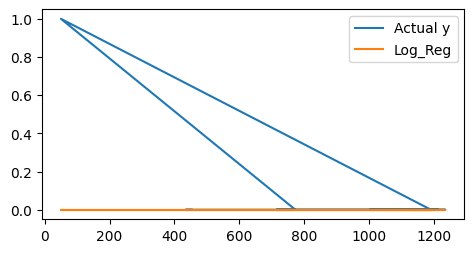

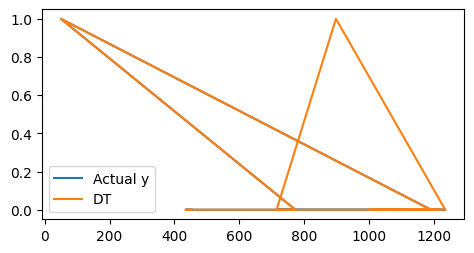

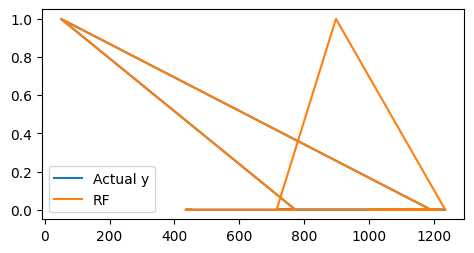

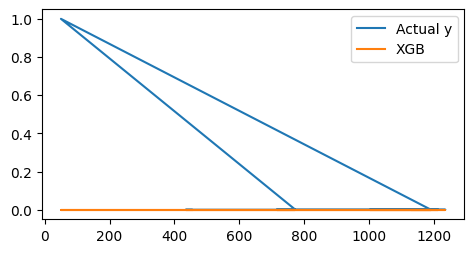

In [ ]:
# drawing plots for visual comparision of predicted and actual values
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.plot(df_compare['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df_compare['y1_LR1'].iloc[0:11],label="Log_Reg")
plt.legend()

plt.figure(figsize=(12,6))
plt.subplot(222)
plt.plot(df_compare['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df_compare["y1_DT1"].iloc[0:11],label="DT")
plt.legend()

plt.figure(figsize=(12,6))
plt.subplot(223)
plt.plot(df_compare['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df_compare["y1_RF1"].iloc[0:11],label="RF")
plt.legend()

plt.figure(figsize=(12,6))
plt.subplot(224)
plt.plot(df_compare['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df_compare["y1_XGB1"].iloc[0:11],label="XGB")
plt.legend()

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.88,0.86,0.93,0.91]
precisions = [0.17, 0.37, 0.79, 0.63]
recalls = [0.03, 0.47, 0.47, 0.37]
f1_scores = [0.05, 0.42, 0.59, 0.47]

# Create DataFrame
metrics_predf = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

In [ ]:
metrics_predf

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.88,0.17,0.03,0.05
1,Decision Tree,0.86,0.37,0.47,0.42
2,Random Forest,0.93,0.79,0.47,0.59
3,XGBoost,0.91,0.63,0.37,0.47


##**Visualising Metrics through graphs:**

In [ ]:
metrics_predf.set_index('Model', inplace=True)

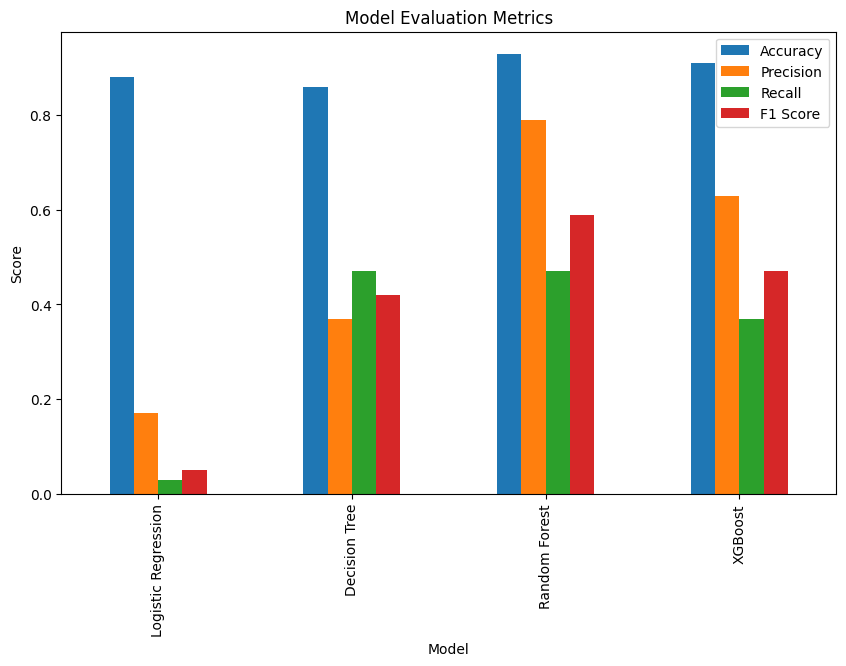

In [ ]:
 # Barplot for all metrics
metrics_predf.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

##**Observations:**

From the metrics and graphs, it is evident that highest accuracy is for **Random Forest Classifier** followed by **XG Boost.** And also the **Cross-Validation Score** for **Random Forest is more consistent**, so from this analysis we can **choose Random Forest Classifier**.

Let's check these metrics after sampling the data, if at all there can be any improvement in metrics and also let's observe how the model predicts after sampling.

#**Model Building(after sampling)**
**Balancing the data using SMOTE**

**Splitting Train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with features and 'Target' is your target variable
X = df1.drop('Approval_Status', axis=1)
y = df1['Approval_Status']

# Step 1: Handle Imbalanced Data (using SMOTE as an example)
smote = SMOTE(random_state=True)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Create Feature Matrix and Target Vector
X_resampled
y_resampled

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=True)

###**Scaling the data:**

In [ ]:
# importing the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(2193, 39)
(549, 39)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(2193,)
(549,)


##**Implementing the Machine Learning Models**

###**Model 1: Logistic Regression**

In [ ]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
L_R=LogisticRegression()
L_R.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
# predicting y for the designed model
y_pred_LR = L_R.predict(X_test_scaled)

###**Model 2: Decision Tree Classifier**

In [ ]:
# for Decicion tree, Random Forest, XGBoost algorithms, no need to use scaled train data,since they work based on nodes.
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = DT.predict(X_test)

###**Model 3: Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = RF.predict(X_test)

###**Model 4: XG Boost Classifier**

In [ ]:
from xgboost import XGBClassifier
XG=XGBClassifier()
XG=XG.fit(X_train,y_train)

In [ ]:
y_pred_XG = XG.predict(X_test)

##**Comparing actual 'y_test' values with 'predicted-y' values from various models**

In [ ]:
# creating a data frame to see the values for predicted and actual values.
df2 = pd.DataFrame({"Actual_y":y_test,"y_Log_Reg":y_pred_LR,"y_DT":y_pred_DT,"y_RF":y_pred_RF,"y_XGB":y_pred_XG})

In [ ]:
df2

,Actual_y,y_Log_Reg,y_DT,y_RF,y_XGB
2501,1,1,1,1,1
1028,0,0,0,0,0
558,0,0,1,0,1
1438,0,0,0,0,0
428,0,0,0,0,0
...,...,...,...,...,...
1239,0,0,0,0,0
918,0,0,0,0,0
1506,0,0,0,0,0
785,0,0,0,0,0


##**Comparing the values actual_y with y_pred visually through graphs:**

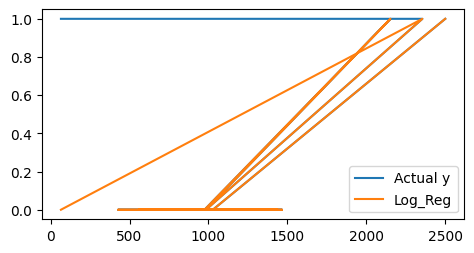

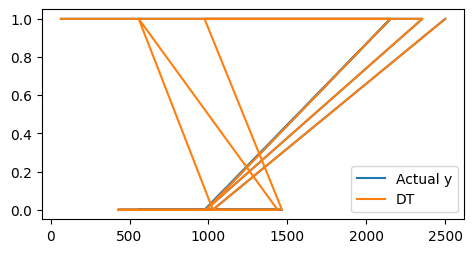

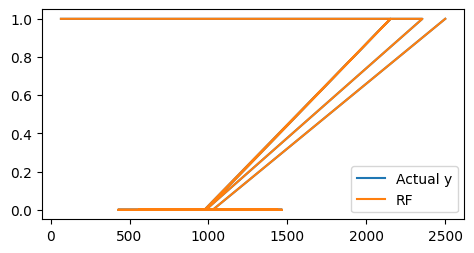

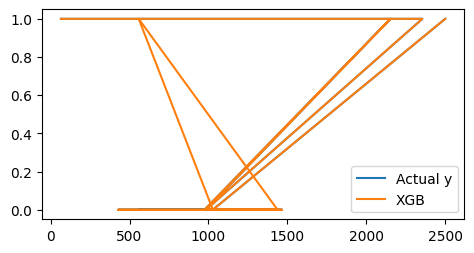

In [ ]:
# drawing plots for visual comparision of predicted and actual values
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2['y_Log_Reg'].iloc[0:11],label="Log_Reg")
plt.legend()

plt.figure(figsize=(12,6))
plt.subplot(222)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2["y_DT"].iloc[0:11],label="DT")
plt.legend()

plt.figure(figsize=(12,6))
plt.subplot(223)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2["y_RF"].iloc[0:11],label="RF")
plt.legend()

plt.figure(figsize=(12,6))
plt.subplot(224)
plt.plot(df2['Actual_y'].iloc[0:11],label="Actual y")
plt.plot(df2["y_XGB"].iloc[0:11],label="XGB")
plt.legend()

##**Evaluating the models using metrics:**

##**1) Logistic Regression**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("accuracy_score:",accuracy_score(y_test,y_pred_LR))
print("precision_score:",precision_score(y_test,y_pred_LR))
print("recall_score:",recall_score(y_test,y_pred_LR))
print("f1_score:",f1_score(y_test,y_pred_LR))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_LR))

accuracy_score: 0.8415300546448088
precision_score: 0.9039301310043668
recall_score: 0.7610294117647058
f1_score: 0.8263473053892215
confusion_matrix:
 [[255  22]
 [ 65 207]]


**Cross Validation score**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_LR=cross_val_score(L_R,X,y,scoring="accuracy", cv=5)
print(cv_LR)

[0.88996764 0.88961039 0.88961039 0.88961039 0.88961039]


##**2) Decision Tree**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("accuracy_score:",accuracy_score(y_test,y_pred_DT))
print("precision_score:",precision_score(y_test,y_pred_DT))
print("recall_score:",recall_score(y_test,y_pred_DT))
print("f1_score:",f1_score(y_test,y_pred_DT))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_DT))

accuracy_score: 0.9052823315118397
precision_score: 0.8819444444444444
recall_score: 0.9338235294117647
f1_score: 0.9071428571428571
confusion_matrix:
 [[243  34]
 [ 18 254]]


**Cross Validation score**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_DT=cross_val_score(DT,X,y,scoring="accuracy", cv=5)
print(cv_DT)

[0.83495146 0.83116883 0.84090909 0.82467532 0.80519481]


##**3) Random Forest**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("accuracy_score:",accuracy_score(y_test,y_pred_RF))
print("precision_score:",precision_score(y_test,y_pred_RF))
print("recall_score:",recall_score(y_test,y_pred_RF))
print("f1_score:",f1_score(y_test,y_pred_RF))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_RF))

accuracy_score: 0.9489981785063752
precision_score: 0.9388489208633094
recall_score: 0.9595588235294118
f1_score: 0.9490909090909091
confusion_matrix:
 [[260  17]
 [ 11 261]]


**Cross Validation score**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_RF=cross_val_score(RF,X,y,scoring="accuracy", cv=5)
print(cv_RF)

[0.88349515 0.88311688 0.88636364 0.87337662 0.88311688]


##**4) XG Boost classifier**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print("accuracy_score:",accuracy_score(y_test,y_pred_XG))
print("precision_score:",precision_score(y_test,y_pred_XG))
print("recall_score:",recall_score(y_test,y_pred_XG))
print("f1_score:",f1_score(y_test,y_pred_XG))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_XG))

accuracy_score: 0.9526411657559198
precision_score: 0.9424460431654677
recall_score: 0.9632352941176471
f1_score: 0.9527272727272728
confusion_matrix:
 [[261  16]
 [ 10 262]]


**Cross Validation score**

In [ ]:
from sklearn.model_selection import cross_val_score
cv_XG=cross_val_score(XG,X,y,scoring="accuracy", cv=5)
print(cv_XG)

[0.86731392 0.86688312 0.88636364 0.87012987 0.86688312]


##**Creating a data frame for all the metrics:**

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.84,0.93,0.95,0.95]
precisions = [0.90, 0.91, 0.94, 0.94]
recalls = [0.76, 0.94, 0.96, 0.96]
f1_scores = [0.82, 0.93, 0.95, 0.95]

# Create DataFrame
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.84,0.90,0.76,0.82
1,Decision Tree,0.93,0.91,0.94,0.93
2,Random Forest,0.95,0.94,0.96,0.95
3,XGBoost,0.95,0.94,0.96,0.95


##**Visualising the metrics:**

In [ ]:
metrics_df.set_index('Model', inplace=True)       # setting the modelnames as index

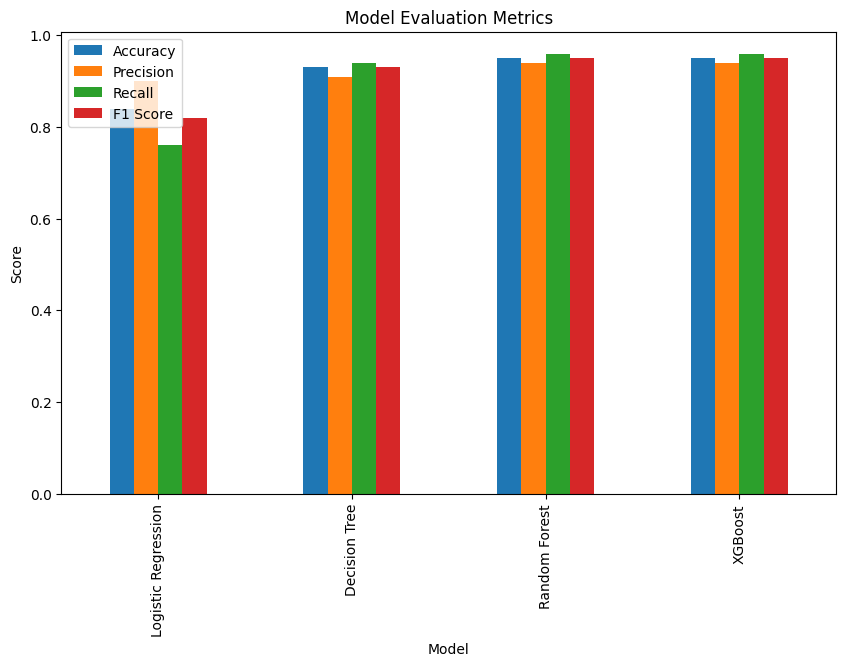

In [ ]:
# Barplot for all metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()

##**Observations:**

From the scores and graphical representation, both **Random Forest classifier and XG Boost classifier has same metric scores.**

##**Analysing the Confusion matrices of both the models:**
Let's analyze the confusion matrices for both Random Forest and XGBoost:

**Random Forest Confusion Matrix**:

[[260  17]
 [ 11 261]]

**XGBoost Confusion Matrix:**

[[261  16]
 [ 10 262]]

**a)True Positives (TP):**

Random Forest: 261

XGBoost: 262

**b)True Negatives (TN):**

Random Forest: 260

XGBoost: 261

**c)False Positives (FP):**

Random Forest: 17

XGBoost: 16

**d)False Negatives (FN):**

Random Forest: 11

XGBoost: 10



*   The number of false positives (misclassifying negatives as positives) and false negatives (misclassifying positives as negatives) is **relatively low for both models.**
*   Both models have a similar number of true positives and true negatives, indicating they **correctly predicted the positive and negative classes** to a large extent.

Both the models seem to perform well based on confusion matrices.





##**Analysing Cross-Validation scores of both the models:**

So, let's consider the **Cross-Validation scores** of both the models to choose better performing one.

This is a summary of the cross-validation scores:

**XGBoost** Cross-Validation Scores: [0.8673, 0.8669, 0.8864, 0.8701, 0.8669]

**Random Forest** Cross-Validation Scores: [0.8835, 0.8799, 0.8799, 0.8734, 0.8799]  

**Random Forest** has **consistently higher cross-validation scores**, suggesting that, on average, it performs ***slightly better*** across different subsets of the data. So, for future data prediction regarding whether to accept or reject the credit card issuance to the customers, this model can be deployed.

#**Proposed Model: Random Forest Classifier.**

#**Answering all the questions asked on Credit Card Approval Project:**

###**1) Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**
Predictive models assist banks in better managing risks associated with credit card issuance. By analyzing historical data and identifying patterns indicative of potential default, machine learning models contribute to more accurate risk assessments.

This, in turn, helps banks make informed decisions, reducing the likelihood of financial losses.  

###**2) How is it going to impact the banking sector?**
Machine learning-based credit card approval prediction model positively influences the banking sector by


*   enhancing risk management
*   operational efficiency


*   customer satisfaction
*   overall competitiveness.

The impact is multifaceted, reaching into various facets of the banking ecosystem and contributing to a more resilient and customer-centric financial industry.

###**3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**
a.Machine learning models can incorporate non-traditional data sources (e.g., social media behavior, online transactions) to assess creditworthiness, potentially including a broader segment of the population in the credit approval process.

b.They  are capable of continuous learning and adaptation, allowing banks to respond more dynamically to economic shifts, ensuring that credit decision criteria remain relevant and effective.

c.They can contribute to fair lending practices by reducing bias and ensuring more equitable credit decisions.



##**Data analysis approach**

###**1) What approach are you going to take in order to prove or disprove your hypothesis?**
I have considered null hypothesis for few variables

eg., **Annual Income and Approval status:**

**Null Hypothesis:** There is no significant difference in the mean income between approved and rejected credit card applications.

**Test:** Independent t-test.

Since the test statistic value was less than 0.05, I rejected null hypothesis.
Similarly i have done chi-square test and t-tests for other variableswith target variable.
###**2) What feature engineering techniques will be relevant to your project?**
I did Feature scaling(standardisation), feature encoding using label/ordinal encoders, imputed the null values with mean/median, deleted less significant features too.

###**3) Please justify your data analysis approach.**
For preparing the data for modelling, univariate,multivariate analysis has to be performed,to see how target variable is varying with each feature.

I plotted pair plots(each feature with target variable),histograms(to see numerical data distribution),boxplots(to see outliers),barplots(to plot categorical-numerical data) etc.,

I also checked the correlation coeeficients using heatmap.

This approach tells us which features are significant and which are not for target variable prediction.

###**4) Identify important patterns in your data using the EDA approach to justify your findings.**

There were null values, outliers, no duplicates, no incorrect data types. So I removed few null values, clipped the outliers, observed the pearson and spearman correlation coefficients, observed the statistical measures through "describe" function etc.,

There was weak correlation with target variable.

Patterns like more income leads to better chance of getting the approval.

Middle aged people have more chances of getting credit card approved.

Currently employed persons have better chance of credit card approved than unemployed etc.,


##**Machine learning approach**

###**1) What method will you use for machine learning based predictions for credit card approval?**
I had choosen **Classification** based models since the target variable is either approved or rejected.

I used 4 models. They are:

Logistic regression, Decision Tree classifier, Random Forest classifier, XG Boost classifier.

###**2) Please justify the most appropriate model.**
From the modelling and analysis of various models on the data set, the **Random Forest Classifier** performs better for both **balanced and imbalanced data set.**

It's ***accuracy score*** is pretty good **0.93(pre-sampling)** and **0.95(post-sampling)** and there is c**onsistency in the Cross-Validation scores** as well.

Thus, amongst all the other 3 models, **Random Forest Classifier** would be better choice for predictions on any new data.

###**3) Please perform necessary steps required to improve the accuracy of your model.**

We can use hyper parameter tuning, Grid search CV etc.,to better the model, but I havent used any of them as already the accuracy score in 0.95 which is high.

###**4) Please compare all models (at least 4  models).**
I compared all the models, through dataframes, plots and metrics scores(accuracy,precision,recall,f1 scores) and confusion matrices too.

I also compared the Cross-Validation scores of all the models,out of which the Random Forest's is better.

So I decided to choose and propse **Random Forest Classifier** for the data set.


##**Conclusion:**

Data set had been cleaned, encoded, modelled for data predictions.

From the modelling and analysis of various models on the data set, the **Random Forest Classifier** performs better for both **balanced and imbalanced data set.**

It's ***accuracy score*** is pretty good **0.93(pre-sampling)** and **0.95(post-sampling)** and there is c**onsistency in the Cross-Validation scores** as well.

Thus, amongst all the other 3 models, **Random Forest Classifier** would be better choice for predictions on any new data.

#**Predicting the Approval_Status for a new customer using Random Forest Classifier Model:**

In [ ]:
df.head(1)

,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Mobile_phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Approval_Status,Employment_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.39,1,0,0,0,other,2,1,0


In [ ]:
df_new = df.copy(deep=True)

In [ ]:
df_new = df_new.drop(columns='Ind_ID',axis=1)

In [ ]:
df1.columns

Index(['Children', 'Annual_income', 'Education', 'Age', 'Family_Members',
       'Approval_Status', 'Employment_Status', 'Gender_M', 'Property_Owner_Y',
       'Car_Owner_Y', 'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers',
       'Type_Occupation_Medicine staff',
       'Type_Occupation_Private service 

###**Creating a new customer data:**

In [ ]:
New_Customer = {'Children':2, 'Annual_income':200000.0, 'Education':2, 'Age':36, 'Family_Members':5,
       'Employment_Status':1, 'Gender_M':0, 'Property_Owner_Y':0,
       'Car_Owner_Y':0, 'Type_Income_Pensioner':0, 'Type_Income_State servant':1,
       'Type_Income_Working':0, 'Marital_status_Married':0,
       'Marital_status_Separated':1, 'Marital_status_Single / not married':0,
       'Marital_status_Widow':0, 'Housing_type_House / apartment':0,
       'Housing_type_Municipal apartment':0, 'Housing_type_Office apartment':0,
       'Housing_type_Rented apartment':0, 'Housing_type_With parents':1,
       'Type_Occupation_Cleaning staff':0, 'Type_Occupation_Cooking staff':0,
       'Type_Occupation_Core staff':0, 'Type_Occupation_Drivers':0,
       'Type_Occupation_HR staff':0, 'Type_Occupation_High skill tech staff':0,
       'Type_Occupation_IT staff':1, 'Type_Occupation_Laborers':0,
       'Type_Occupation_Low-skill Laborers':0, 'Type_Occupation_Managers':0,
       'Type_Occupation_Medicine staff':0,
       'Type_Occupation_Private service staff':0,
       'Type_Occupation_Realty agents':0, 'Type_Occupation_Sales staff':0,
       'Type_Occupation_Secretaries':0, 'Type_Occupation_Security staff':0,
       'Type_Occupation_Waiters/barmen staff':0, 'Type_Occupation_other':0}

df_new_cust = pd.DataFrame(New_Customer,index=[0])
df_new_cust

,Children,Annual_income,Education,Age,Family_Members,Employment_Status,Gender_M,Property_Owner_Y,Car_Owner_Y,Type_Income_Pensioner,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Type_Occupation_other
0,2,200000.0,2,36,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# predicting the approval status for new customer using random forest
Approval_status_RF = RF.predict(df_new_cust)

In [ ]:
Approval_status_RF

array([0])

##**Result:** Our model predicted Approval_Status as **0** which means the credit card can be approved to the new customer.

#**SQL**

**Use MySQL or PyMySQL to perform the below queries.**

**Note: Use only the cleaned data for SQL part of the project.**

In [ ]:
import  duckdb
conn = duckdb.connect()                # importing duckdb in order to work on SQL questions from the cleaned dataset
conn.register('df',df)
conn.execute("select * from df where approval_status=1").fetchdf()

**1) Group the customers based on their income type and find the average of their annual income.**

In [ ]:
conn.register('df',df)
conn.execute("Select Type_Income, avg(Annual_income) as Avg_Annual_income from df GROUP BY Type_Income").fetchdf()

,Type_Income,Avg_Annual_income
0,Pensioner,151265.544944
1,Working,177922.166038
2,State servant,201286.956522
3,Commercial associate,213979.945055


**2) Find the female owners of cars and property.**

In [ ]:
conn.register('df',df)
conn.execute("select Car_Owner, Property_Owner from df where Gender='F' and Car_Owner='Y' and Property_Owner='Y'").fetchdf()

,Car_Owner,Property_Owner
0,Y,Y
1,Y,Y
2,Y,Y
3,Y,Y
4,Y,Y
...,...,...
172,Y,Y
173,Y,Y
174,Y,Y
175,Y,Y


**There are 177 females whow own both car and property**

**3) Find the male customers who are staying with their families.**

In [ ]:
conn.register('df',df)
conn.execute("select * from df where Gender = 'M' and Family_Members>=2").fetchdf()

,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Mobile_phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Approval_Status,Employment_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.39,1,0,0,0,other,2,1,0
1,5010864,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,49.75,1,0,1,1,Core staff,3,1,1
2,5010868,M,Y,Y,1,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,49.75,1,0,1,1,Core staff,3,1,1
3,5021303,M,N,N,1,380250.0,Pensioner,Higher education,Married,With parents,24.39,1,0,0,1,other,3,1,1
4,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,46.26,1,0,0,0,Laborers,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,49.21,1,0,0,0,Drivers,2,0,1
466,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,36.51,1,0,0,0,Low-skill Laborers,2,0,1
467,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,30.92,1,0,1,0,Drivers,3,0,1
468,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.07,1,0,0,0,Managers,4,0,1


**There are 470 males who stay with their families.**

**4) Please list the top five people having the highest income.**

In [ ]:
conn.register('df',df)
conn.execute("select * from df order by Annual_income desc limit 5").fetchdf()

,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Mobile_phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Approval_Status,Employment_Status
0,5010864,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Married,House / apartment,49.75,1,0,1,1,Core staff,3,1,1
1,5010868,M,Y,Y,1,380250.0,Pensioner,Secondary / secondary special,Married,House / apartment,49.75,1,0,1,1,Core staff,3,1,1
2,5010869,M,Y,Y,1,380250.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,49.75,1,0,1,1,Core staff,1,1,1
3,5021303,M,N,N,1,380250.0,Pensioner,Higher education,Married,With parents,24.39,1,0,0,1,other,3,1,1
4,5024213,F,Y,Y,0,380250.0,Commercial associate,Higher education,Married,House / apartment,42.99,1,0,1,0,other,2,1,1


**The top 5 people having highest income with 380250.0 are either Pensioner / Commercial associat.**

**5) How many married people are having bad credit?**

In [ ]:
conn.register('df',df)
conn.execute("select * from df where Marital_Status='Married' and Approval_Status=1").fetchdf()

,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Mobile_phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Approval_Status,Employment_Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.390000,1,0,0,0,other,2,1,0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.120000,1,1,1,0,other,2,1,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,43.937018,1,1,1,0,other,2,1,1
3,5009749,F,Y,N,0,162000.0,Commercial associate,Higher education,Married,House / apartment,37.120000,1,1,1,0,other,2,1,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.120000,1,1,1,0,other,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,5149188,M,Y,N,1,380250.0,Working,Higher education,Married,House / apartment,26.960000,1,0,1,1,Core staff,3,1,1
106,5149190,M,Y,N,1,380250.0,Working,Higher education,Married,House / apartment,26.960000,1,0,1,1,Core staff,3,1,1
107,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,47.500000,1,0,0,0,Managers,2,1,1
108,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,33.910000,1,0,1,1,Medicine staff,2,1,1


**110 Married people are having bad credit count.**

**6) What is the highest education level and what is the total count?**

In [ ]:
conn.register('df',df)
conn.execute("select Education as Highest_Education_level,count(*) as Total_Count from df group by Education order by Total_Count desc limit 1").fetchdf()

,Highest_Education_level,Total_Count
0,Secondary / secondary special,1029


**The Education level with highest count is Secondary/secondary special with 1029 rows.**

**7) Between married males and females, who is having more bad credit?**

In [ ]:
conn.register('df', df)
conn.execute("""
    select Gender, count(*) as Bad_Credit_Count
    from df
    where Marital_Status = 'Married' and Approval_Status = 1
    group by Gender
    order by Bad_Credit_Count DESC
""").fetchdf()

,Gender,Bad_Credit_Count
0,F,59
1,M,51


**Between married males and females, females have more bad credit count.**

#**Conclusion:**

**I have answered all the questions for DA , ML and SQL parts, I also created a new customer with all details and checked with my proposed model in order to predict the approval status of the customer and finished the project.**



---

